In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
%matplotlib inline
import matplotlib.pyplot as plt

import fix_yahoo_finance as fyf
fyf.pdr_override()

load price history

In [2]:
spy = data.DataReader('spy', start = '2001-06-15', end = '2016-06-15', 
                      data_source='yahoo')
spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-06-15,122.400002,120.400002,120.910004,121.849998,16821100.0,86.725998
2001-06-18,122.440002,120.910004,121.650002,121.260002,11368300.0,86.306084
2001-06-19,122.889999,120.889999,122.379997,121.790001,7732300.0,86.683273
2001-06-20,122.860001,121.099998,121.190002,122.430000,8787200.0,87.138802
2001-06-21,124.309998,122.150002,122.220001,123.820000,12259100.0,88.128128


use closing price

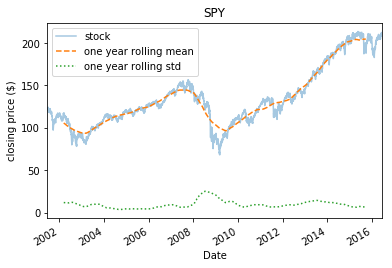

In [3]:
spyc = spy['Close']

spyr = spyc.rolling(365, center=True)

spyp = pd.DataFrame({'stock': spyc,
                    'one year rolling mean': spyr.mean(),
                   'one year rolling std': spyr.std()})

spyp.plot(style=['-', '--', ':']).lines[0].set_alpha(0.4)
plt.title('SPY')
plt.legend(frameon=True, loc=2)
plt.ylabel('closing price ($)');

In [4]:
ivv = data.DataReader('ivv', start = '2001-06-15', end = '2016-06-15',
                      data_source='yahoo')
ivv.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-06-15,122.269997,120.660004,120.900002,121.839996,429300.0,86.482201
2001-06-18,122.309998,120.949997,121.709999,120.949997,3350000.0,85.850510
2001-06-19,122.879997,121.000000,122.419998,121.349998,76400.0,86.134399
2001-06-20,122.720001,121.129997,121.129997,122.279999,203800.0,86.794502
2001-06-21,124.239998,122.120003,122.120003,123.680000,64400.0,87.788254


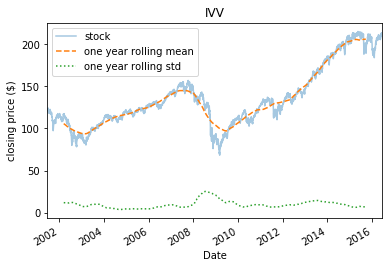

In [5]:
ivvc = ivv['Close']

ivvr = ivvc.rolling(365, center=True)

ivvp = pd.DataFrame({'stock': ivvc,
                    'one year rolling mean': ivvr.mean(),
                   'one year rolling std': ivvr.std()})

ivvp.plot(style=['-', '--', ':']).lines[0].set_alpha(0.4)
plt.title('IVV')
plt.legend(frameon=True, loc=2)
plt.ylabel('closing price ($)');

In [6]:
vti = data.DataReader('vti', start = '1980',end = '2016-06-15',
                      data_source='yahoo')
vti.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-06-15,56.005001,55.174999,55.424999,55.665001,1067400.0,40.105549
2001-06-18,55.915001,55.310001,55.814999,55.310001,282600.0,39.849766
2001-06-19,56.165001,55.235001,56.150002,55.465000,1777600.0,39.961430
2001-06-20,56.075001,55.375000,55.375000,56.049999,476000.0,40.382935
2001-06-21,56.724998,55.875000,56.000000,56.500000,240400.0,40.707146


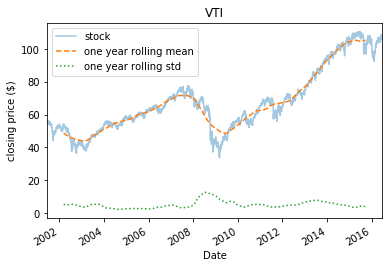

In [7]:
vtic = vti['Close']

vtir = vtic.rolling(365, center=True)

vtip = pd.DataFrame({'stock': vtic,
                    'one year rolling mean': vtir.mean(),
                   'one year rolling std': vtir.std()})

vtip.plot(style=['-', '--', ':']).lines[0].set_alpha(0.4)
plt.title('VTI')
plt.legend(frameon=True, loc=2)
plt.ylabel('closing price ($)');

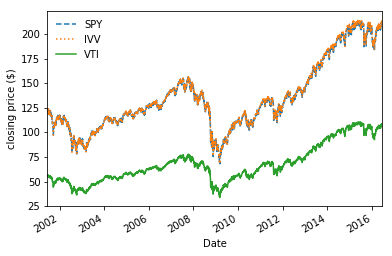

In [8]:
spyc.plot(style=['--']).set_alpha(0.1) # all on same plot
ivvc.plot(style=[':']).set_alpha(0.1)
vtic.plot(style=['-'])
plt.legend(['SPY', 'IVV', 'VTI'], loc=2, frameon=False) # create a legend
plt.ylabel('closing price ($)');

one year return on investment over time span

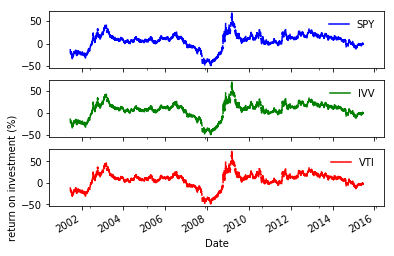

In [9]:
spyc_roi = 100 * (spyc.tshift(-365, freq='D') / spyc - 1)
ivvc_roi = 100 * (ivvc.tshift(-365, freq='D') / ivvc - 1)
vtic_roi = 100 * (vtic.tshift(-365, freq='D') / vtic - 1)

fig, ax = plt.subplots(3, sharex=True)

spyc_roi.plot(ax=ax[0], color='b')
ax[0].legend(['SPY'], loc=1, frameon=False)

ivvc_roi.plot(ax=ax[1], color='g')
ax[1].legend(['IVV'], loc=1, frameon=False)

vtic_roi.plot(ax=ax[2], color='r')
ax[2].legend(['VTI'], loc=1, frameon=False)

plt.ylabel('return on investment (%)');

calculate the compound annual growth rate for each over the time span

In [10]:
startdate = '2001-06-15', 'Close'
enddate = '2016-06-15', 'Close'

ys = (spy.index[-1] - spy.index[0]) / np.timedelta64(1, 'Y')
ys = ys // 1
spy_cagr = (((spy.loc[enddate] / spy.loc[startdate]) ** (1/ys)) - 1) * 100
print('SPY compound annual growth rate:',spy_cagr,'%')

yi = (ivv.index[-1] - ivv.index[0]) / np.timedelta64(1, 'Y')
yi = yi // 1
ivv_cagr = (((ivv.loc[enddate] / ivv.loc[startdate]) ** (1/yi)) - 1) * 100
print('IVV compound annual growth rate:',ivv_cagr,'%')

yv = (vti.index[-1] - vti.index[0]) / np.timedelta64(1, 'Y')
yv = yv // 1
vti_cagr = (((vti.loc[enddate] / vti.loc[startdate]) ** (1/yv)) - 1) * 100
print('VTI compound annual growth rate:',vti_cagr,'%')

SPY compound annual growth rate: 3.620981183866978 %
IVV compound annual growth rate: 3.655387977969249 %
VTI compound annual growth rate: 4.37692697397003 %
